In [1]:
from pyspark.sql import SparkSession

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1604241517055_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("kiwisolver==1.2.0")
sc.install_pypi_package("seaborn")
sc.install_pypi_package("tabulate")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



In [7]:
import numpy as np
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.window import Window
from pyspark.sql import Row
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
in_bucket = "s3://tfmbigdata/Files_Segunda_Entrega/tickets*.json"
tickets = spark.read.format("json").load(in_bucket)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
tickets.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+----------+--------------+----------+--------------+---------+--------+-------+--------------------+-------------+
|   cardtype|       customerid|   datekey|extendedamount|linenumber|originalamount|productid|quantity|storeid|            ticketid|totaldiscount|
+-----------+-----------------+----------+--------------+----------+--------------+---------+--------+-------+--------------------+-------------+
|     Mobile|77000000054018843|2019-08-06|          0.37|         1|          0.37|  5706168|     1.0| ES0491|10000491320190806...|          0.0|
|     Mobile|77000000054018843|2019-08-06|          0.35|         3|          0.35|   126942|     1.0| ES0491|10000491320190806...|          0.0|
|DigitalCard|77000000154031081|2019-08-06|          1.15|        33|          1.15|    82512|     1.0| ES0767|10000767220190806...|          0.0|
|DigitalCard|77000000154031081|2019-08-06|          0.92|        34|          0.92|    74530|     1.0| ES0767|10000767220190

In [12]:
rows_count = tickets.count()
columns = len(tickets.columns)
print("Rows: ",rows_count,"\nColumns: ", columns)
tickets = tickets.distinct()
rows_count = tickets.count()
columns = len(tickets.columns)
print("Rows: ",rows_count,"\nColumns: ", columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Rows:  13238241 
Columns:  11
Rows:  13121119 
Columns:  11

In [13]:
tickets.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------+--------------------+----------+------------------+------------------+------------------+------------------+------------------+--------+--------------------+--------------------+
|summary|   cardtype|          customerid|   datekey|    extendedamount|        linenumber|    originalamount|         productid|          quantity| storeid|            ticketid|       totaldiscount|
+-------+-----------+--------------------+----------+------------------+------------------+------------------+------------------+------------------+--------+--------------------+--------------------+
|  count|   13121119|            13121119|  13121119|          13121119|          13121119|          13121119|          13121119|          13121119|13121105|            13121119|            13121119|
|   mean|       null|7.702484670409921...|      null| 1.711373286073358|13.514151803668573| 1.752652273025392|1640544.7669266623|1.2418671881567407|    null|8.624403849274822E21|0.042775290735515586|


In [14]:
print(tickets.columns)
print(tickets.schema)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['cardtype', 'customerid', 'datekey', 'extendedamount', 'linenumber', 'originalamount', 'productid', 'quantity', 'storeid', 'ticketid', 'totaldiscount']
StructType(List(StructField(cardtype,StringType,true),StructField(customerid,StringType,true),StructField(datekey,StringType,true),StructField(extendedamount,DoubleType,true),StructField(linenumber,LongType,true),StructField(originalamount,DoubleType,true),StructField(productid,LongType,true),StructField(quantity,DoubleType,true),StructField(storeid,StringType,true),StructField(ticketid,StringType,true),StructField(totaldiscount,DoubleType,true)))

In [15]:
summary = tickets.summary()
missing_ratio = 1-(np.array(list(summary.filter(summary['summary'] == 'count').collect()[0].asDict().values())[1:], dtype=int))/rows_count
mr_row = spark.createDataFrame([['missing_ratio']+[float(x)*100 for x in missing_ratio]], summary.columns)
unique_row = products.agg(*(F.countDistinct(F.col(c)).alias(c) for c in tickets.columns)).withColumn('summary',F.lit('unique'))
summary = summary.unionByName(mr_row)
summary = summary.unionByName(unique_row)
summary_pd = summary.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

name 'products' is not defined
Traceback (most recent call last):
NameError: name 'products' is not defined



In [16]:
summary_pd.set_index('summary').T

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

name 'summary_pd' is not defined
Traceback (most recent call last):
NameError: name 'summary_pd' is not defined



In [17]:
print(tabulate(summary_pd.set_index('summary').T, headers = 'keys', tablefmt = 'latex',showindex=True,floatfmt=".3f")) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

name 'summary_pd' is not defined
Traceback (most recent call last):
NameError: name 'summary_pd' is not defined



In [18]:
tickets_gr = tickets.groupby(['customerid','storeid','cardtype','datekey','ticketid','productid']).agg(
    F.sum('extendedamount').alias('extendedamount'),
    F.sum('originalamount').alias('originalamount'),
    F.sum('totaldiscount').alias('totaldiscount'),
    F.sum('quantity').alias('quantity')
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
rows_count = tickets_gr.count()
columns = len(tickets.columns)
print("Rows: ",rows_count,"\nColumns: ", columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Rows:  10592796 
Columns:  11

In [20]:
summary = tickets_gr.summary()
missing_ratio = 1-(np.array(list(summary.filter(summary['summary'] == 'count').collect()[0].asDict().values())[1:], dtype=int))/rows_count
mr_row = spark.createDataFrame([['missing_ratio']+[float(x)*100 for x in missing_ratio]], summary.columns)
unique_row = tickets_gr.agg(*(F.countDistinct(F.col(c)).alias(c) for c in tickets_gr.columns)).withColumn('summary',F.lit('unique'))
summary = summary.unionByName(mr_row)
summary = summary.unionByName(unique_row)
summary_pd = summary.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
print(tabulate(summary_pd.set_index('summary').T, headers = 'keys', tablefmt = 'latex',showindex=True,floatfmt=".3f"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

\begin{tabular}{lrrrlrrrlrr}
\hline
                &    count &                       mean &                     stddev & min                     &                         25\% &                         50\% &                         75\% & max                   &   missing\_ratio &   unique \\
\hline
 customerid     & 10592796 &      77024446580047408.000 &         87829972579457.828 & 77000000050008766       &       77000000168448960.000 &       77000000284649152.000 &       77000000509673040.000 & 77340000025950510     &           0.000 &    49729 \\
 storeid        & 10592786 &                            &                            & ES0201                  &                             &                             &                             & ES7002                &           0.000 &      556 \\
 cardtype       & 10592796 &                            &                            & DigitalCard             &                             &                             &          

## Análisis originalamount 0

In [16]:
quantity_0 = tickets_gr.filter(F.col('originalamount') == 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
quantity_0.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-------+-----------+----------+-----------------------+---------+--------------+--------------+-------------+--------+
|customerid       |storeid|cardtype   |datekey   |ticketid               |productid|extendedamount|originalamount|totaldiscount|quantity|
+-----------------+-------+-----------+----------+-----------------------+---------+--------------+--------------+-------------+--------+
|77000000413449045|ES0333 |Mobile     |2019-07-20|1000033332019072040389 |3839     |0.0           |0.0           |0.0          |1.0     |
|77000000273196260|ES2057 |DigitalCard|2019-06-21|10002057420190621265078|3840     |0.0           |0.0           |0.0          |1.0     |
|77000000649451112|ES0927 |DigitalCard|2019-08-10|10000927320190810209200|3840     |0.0           |0.0           |0.0          |1.0     |
|77340000000075081|ES0428 |DigitalCard|2019-05-22|10000428220190522712118|3840     |0.0           |0.0           |0.0          |1.0     |
|77000000443444452|ES0949 |Digital

In [39]:
summary = quantity_0.summary()
unique_row = quantity_0.agg(*(F.countDistinct(F.col(c)).alias(c) for c in tickets_gr.columns)).withColumn('summary',F.lit('unique'))
summary = summary.unionByName(unique_row)
summary_pd = summary.toPandas()

VBox()

An error was encountered:
Invalid status code '404' from https://10.0.1.165:18888/sessions/0 with error payload: {"msg":"Session '0' not found."}


In [40]:
print(tabulate(summary_pd.set_index('summary').T, headers = 'keys', tablefmt = 'latex',showindex=True,floatfmt=".3f")) 

VBox()

An error was encountered:
Invalid status code '404' from https://10.0.1.165:18888/sessions/0 with error payload: {"msg":"Session '0' not found."}


## Sobre la forma de pago

In [23]:
cardtype_resume = tickets_gr.groupby(['cardtype']).agg(F.countDistinct('ticketid').alias('count'))
cardtype_resume = cardtype_resume.withColumn('relative_frequency', F.col('count')/F.sum('count').over(Window.partitionBy()))
cardtype_resume_pd = cardtype_resume.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
cardtype_resume_pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      cardtype   count  relative_frequency
0       Mobile  104969            0.113840
1       Wallet      72            0.000078
2          UNK    3042            0.003299
3  DigitalCard  810869            0.879400
4  PaymentCard    3119            0.003383

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

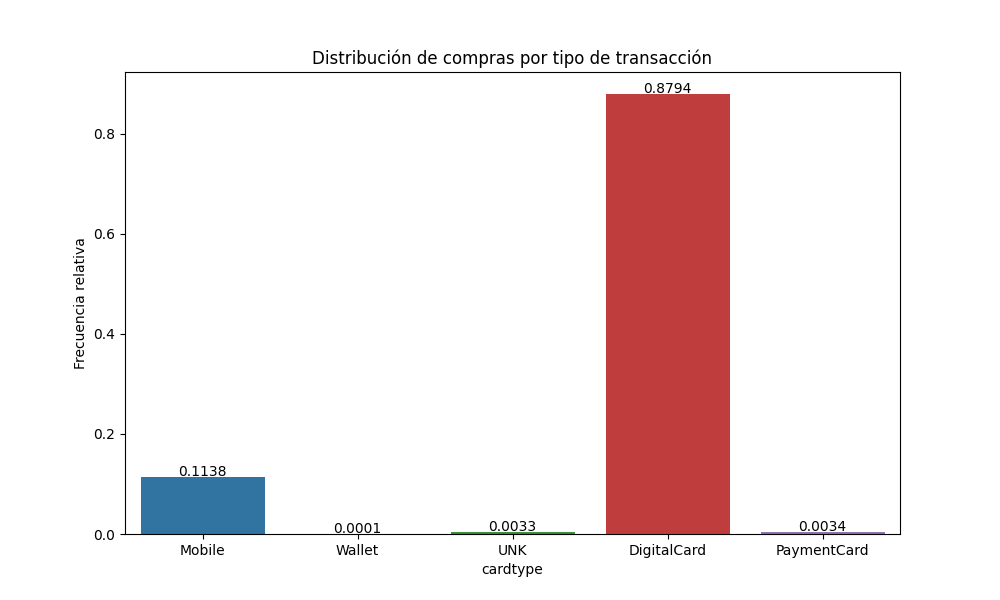

In [27]:
#Visualizamos
plt.clf()
plt.figure(figsize=(10,6))
splot = sns.barplot(y="relative_frequency", x="cardtype", data=cardtype_resume_pd)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+0.01), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 0), 
                   textcoords = 'offset points')
# splot.set_xticklabels(splot.get_xticklabels(), rotation=70)
splot.set_title('Distribución de compras por tipo de transacción')
plt.ylabel('Frecuencia relativa')
# plt.yscale('logit')

%matplot plt

## Sobre la cantidad de productos en la cesta

In [61]:
tickets_resume = tickets_gr.groupby(['customerid','storeid','cardtype','datekey','ticketid']).agg(
    F.sum('extendedamount').alias('extendedamount'),
    F.sum('originalamount').alias('originalamount'),
    F.sum('totaldiscount').alias('totaldiscount'),
    F.sum('quantity').alias('quantity'),
    F.countDistinct('productid').alias('uniqueproducts')
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Análisis de cantidades en la cesta

In [63]:
customer_mean_resume = tickets_resume.groupby(['customerid']).agg(
    F.count('ticketid').alias('frequency'),
    F.mean('extendedamount').alias('extendedamount'),
    F.mean('originalamount').alias('originalamount'),
    F.mean('totaldiscount').alias('totaldiscount'),
    F.mean('quantity').alias('quantity'),
    F.mean('uniqueproducts').alias('uniqueproducts')
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [64]:
customer_mean_resume

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[customerid: string, frequency: bigint, extendedamount: double, originalamount: double, totaldiscount: double, quantity: double, uniqueproducts: double]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

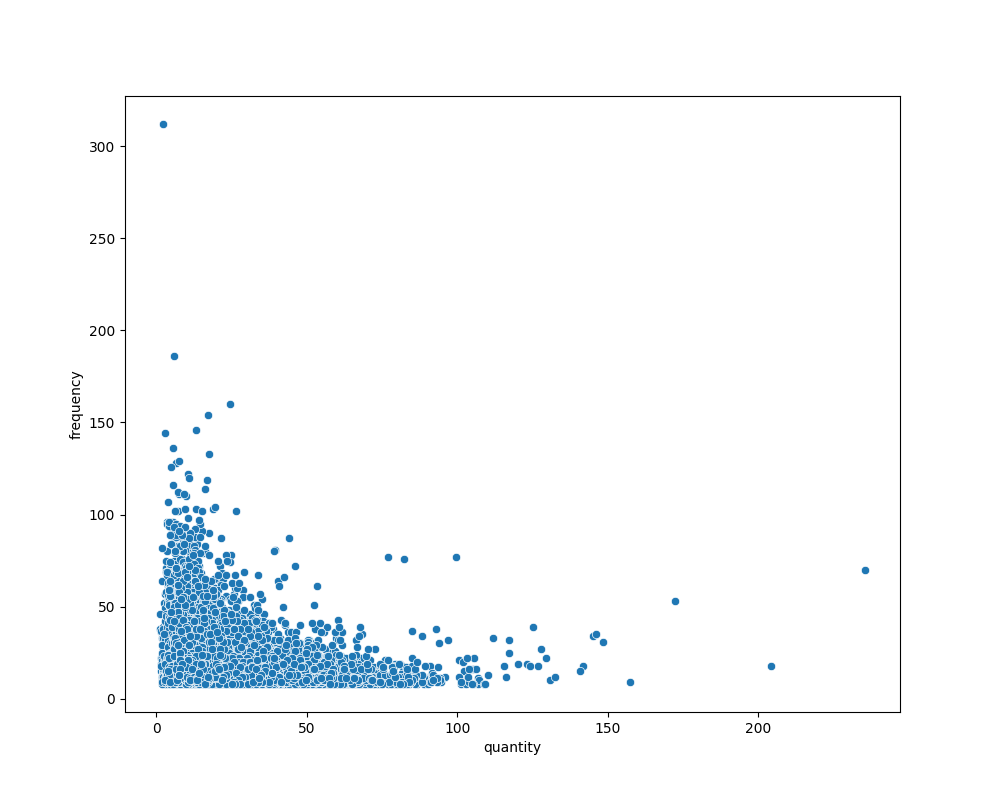

In [37]:
plt.clf()
sns.scatterplot(data=customer_resume, x="quantity", y="frequency")
%matplot plt

In [65]:
# quantity_counts = customer_mean_resume.groupby(F.col('quantity')).count()
quantity_counts_pd = customer_mean_resume.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [66]:
print(tabulate(quantity_counts_pd.describe().T, headers = 'keys', tablefmt = 'latex',showindex=True,floatfmt=".3f")) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

\begin{tabular}{lrrrrrrrr}
\hline
                &     count &   mean &    std &   min &    25\% &    50\% &    75\% &     max \\
\hline
 frequency      & 49729.000 & 18.542 & 10.193 & 8.000 & 11.000 & 16.000 & 23.000 & 312.000 \\
 extendedamount & 49729.000 & 26.462 & 16.906 & 0.656 & 15.042 & 22.353 & 33.236 & 359.692 \\
 originalamount & 49729.000 & 27.055 & 17.091 & 0.772 & 15.492 & 22.929 & 33.936 & 360.535 \\
 totaldiscount  & 49729.000 &  0.614 &  0.614 & 0.000 &  0.227 &  0.450 &  0.798 &  15.895 \\
 quantity       & 49729.000 & 18.924 & 12.042 & 1.368 & 10.815 & 15.966 & 23.638 & 235.384 \\
 uniqueproducts & 49729.000 & 12.384 &  7.291 & 1.000 &  7.375 & 10.647 & 15.393 &  79.467 \\
\hline
\end{tabular}

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

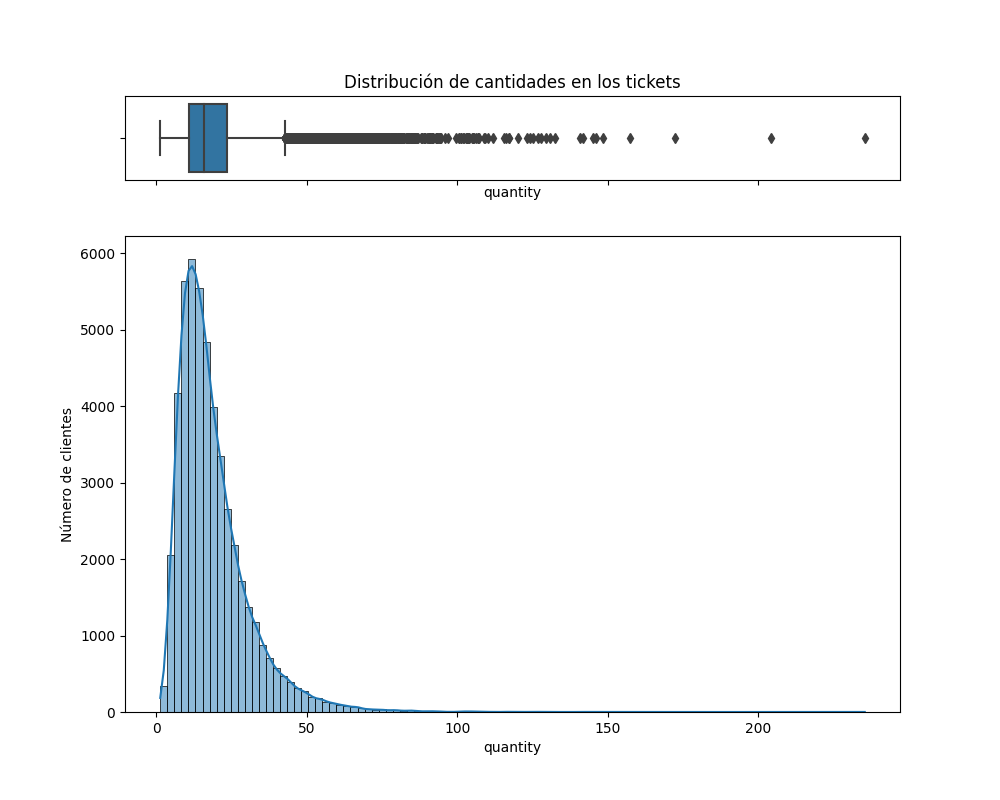

In [67]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x="quantity", data=quantity_counts_pd, ax=ax[0])
sns.histplot(quantity_counts_pd["quantity"],bins=100,ax=ax[1],kde=True)
ax[0].set_title('Distribución de cantidades en los tickets')
plt.ylabel('Número de clientes')
%matplot plt

## Productos unicos en la cesta

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

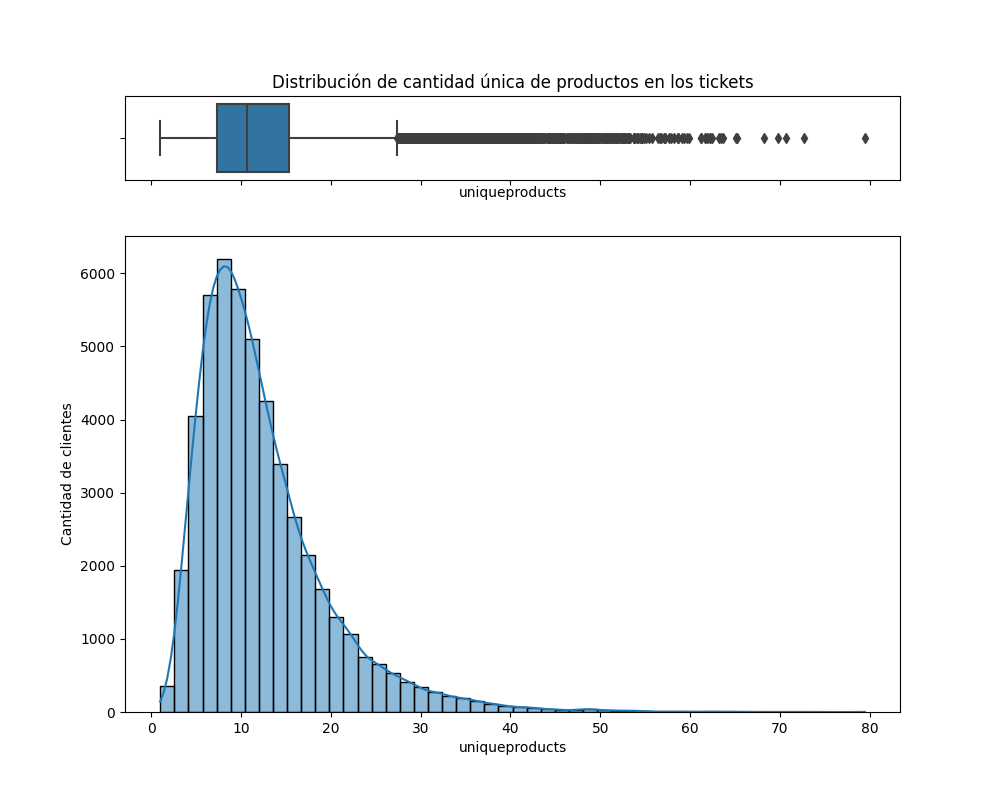

In [71]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x="uniqueproducts", data=quantity_counts_pd, ax=ax[0])
sns.histplot(quantity_counts_pd["uniqueproducts"],bins=50,ax=ax[1],kde=True)
ax[0].set_title('Distribución de cantidad única de productos en los tickets')
plt.ylabel('Cantidad de clientes')
%matplot plt